# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\danie\Desktop\JS projekt DS_DZ\data\penguins_size.csv'
data = pd.read_csv(file_path)

Number of penguins from each island:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


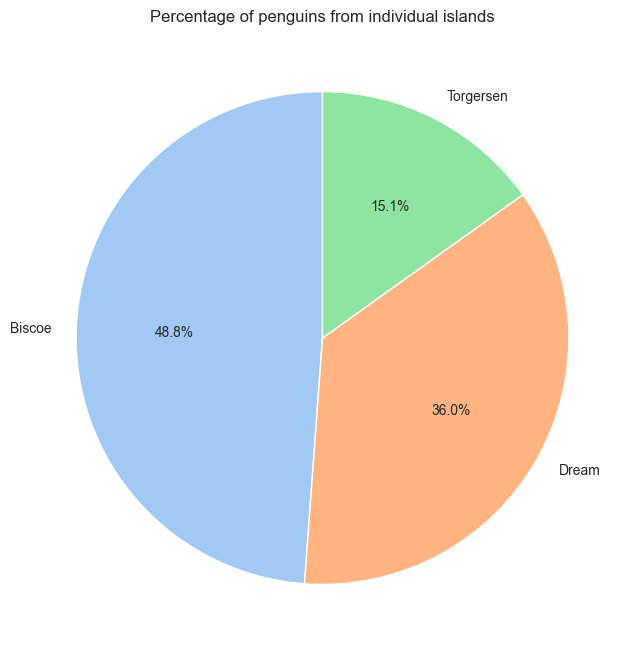

In [60]:
island_counts = data['island'].value_counts()

# Display results
print("Number of penguins from each island:")
print(island_counts)

# Pie chart
plt.figure(figsize=(8, 8))
island_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Percentage of penguins from individual islands")
plt.ylabel("")  # Remove Y-axis label
plt.show()

Penguin species:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


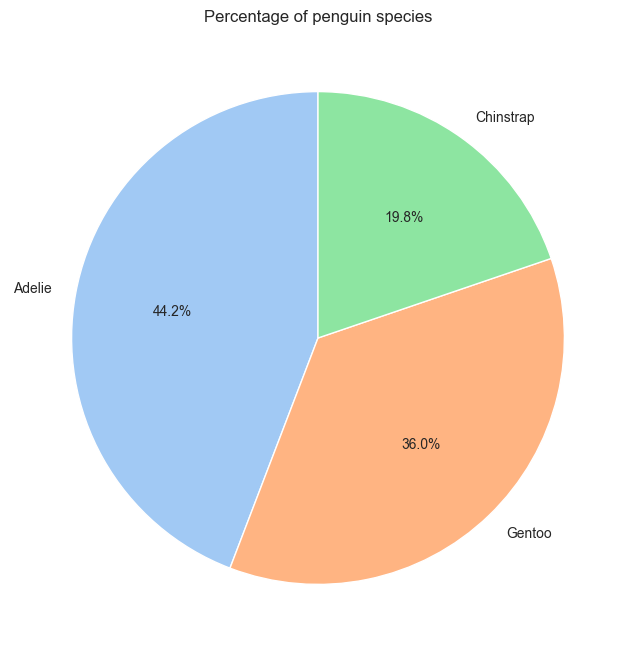

In [62]:
species_counts = data['species'].value_counts()

# Display results
print("Penguin species:")
print(species_counts)

# Pie chart
plt.figure(figsize=(8, 8))
species_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Percentage of penguin species")
plt.ylabel("")  # Remove Y-axis label
plt.show()

Average values:
culmen_length_mm    43.92193
culmen_depth_mm     17.15117
dtype: float64


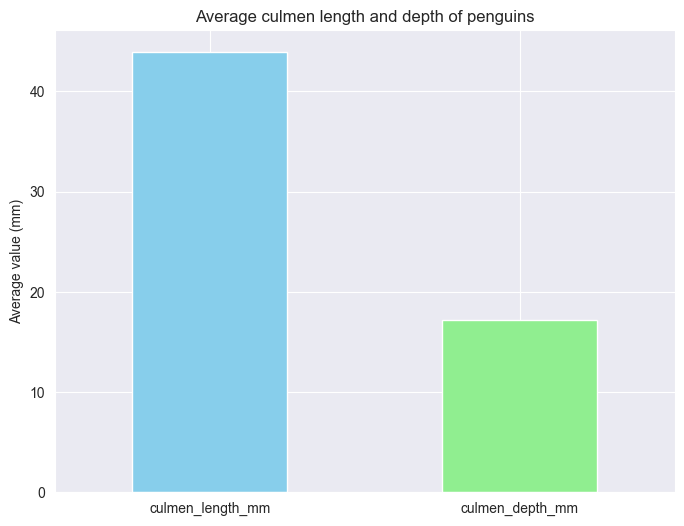

In [63]:
# Calculating average culmen length and depth
average_measurements = data[['culmen_length_mm', 'culmen_depth_mm']].mean()

# Display results
print("Average values:")
print(average_measurements)

# Bar chart
plt.figure(figsize=(8, 6))
average_measurements.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Average culmen length and depth of penguins")
plt.ylabel("Average value (mm)")
plt.xticks(rotation=0)
plt.show()

Total number of penguins: 344
Number of penguins with a culmen longer than average: 175
Number of penguins with a culmen shorter than average: 167


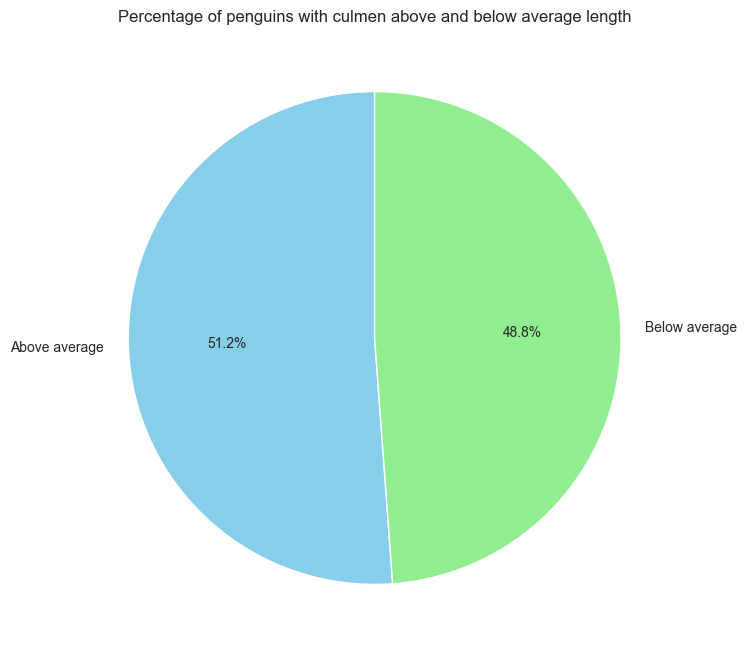

In [64]:
# Classifying penguins by culmen length
average_culmen_length = data['culmen_length_mm'].mean()
penguin_count = len(data)

larger_beak = data[data['culmen_length_mm'] > average_culmen_length]
smaller_beak = data[data['culmen_length_mm'] <= average_culmen_length]

# Display results
print(f"Total number of penguins: {penguin_count}")
print(f"Number of penguins with a culmen longer than average: {len(larger_beak)}")
print(f"Number of penguins with a culmen shorter than average: {len(smaller_beak)}")

# Pie chart
labels = ['Above average', 'Below average']
sizes = [len(larger_beak), len(smaller_beak)]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Percentage of penguins with culmen above and below average length")
plt.show()

Total number of penguins: 344
Number of penguins with a culmen wider than average: 182
Number of penguins with a culmen narrower than average: 160


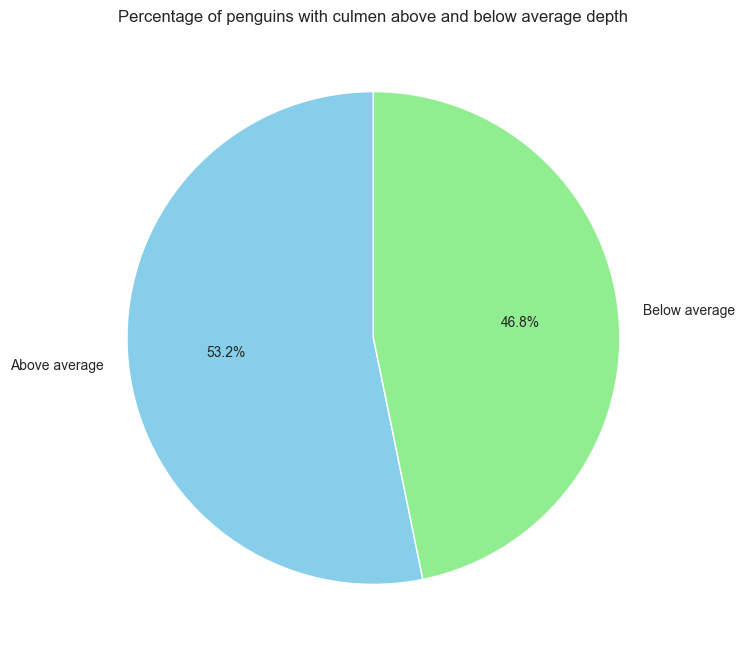

In [65]:
# Classifying penguins by culmen depth
average_culmen_depth = data['culmen_depth_mm'].mean()

larger_beak = data[data['culmen_depth_mm'] > average_culmen_depth]
smaller_beak = data[data['culmen_depth_mm'] <= average_culmen_depth]

# Display results
print(f"Total number of penguins: {penguin_count}")
print(f"Number of penguins with a culmen wider than average: {len(larger_beak)}")
print(f"Number of penguins with a culmen narrower than average: {len(smaller_beak)}")

# Pie chart
labels = ['Above average', 'Below average']
sizes = [len(larger_beak), len(smaller_beak)]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Percentage of penguins with culmen above and below average depth")
plt.show()

Penguin species on individual islands:
species    Adelie  Chinstrap  Gentoo
island                              
Biscoe       44.0        NaN   124.0
Dream        56.0       68.0     NaN
Torgersen    52.0        NaN     NaN


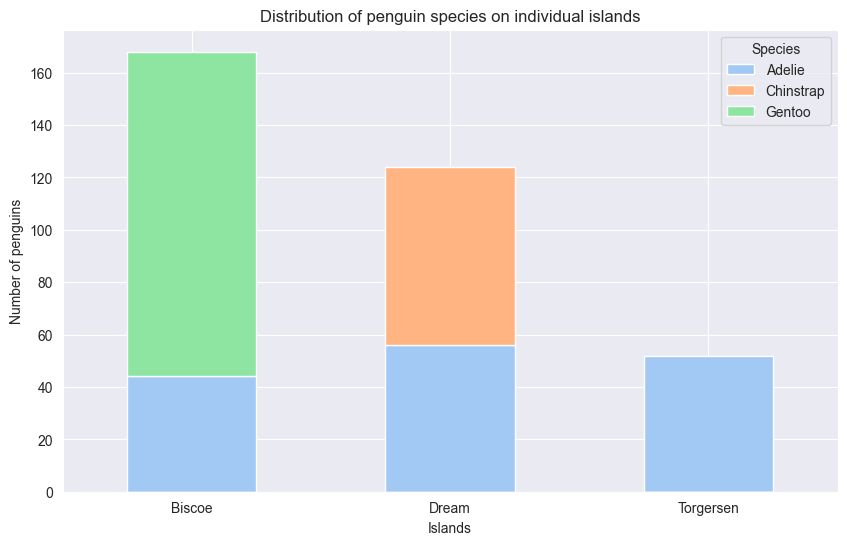

In [66]:
# Grouping data by islands and species
species_island_counts = data.groupby(['island', 'species']).size().unstack()

# Display results
print("Penguin species on individual islands:")
print(species_island_counts)

# Stacked bar chart
species_island_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('pastel'))
plt.title("Distribution of penguin species on individual islands")
plt.ylabel("Number of penguins")
plt.xlabel("Islands")
plt.xticks(rotation=0)
plt.legend(title="Species")
plt.show()

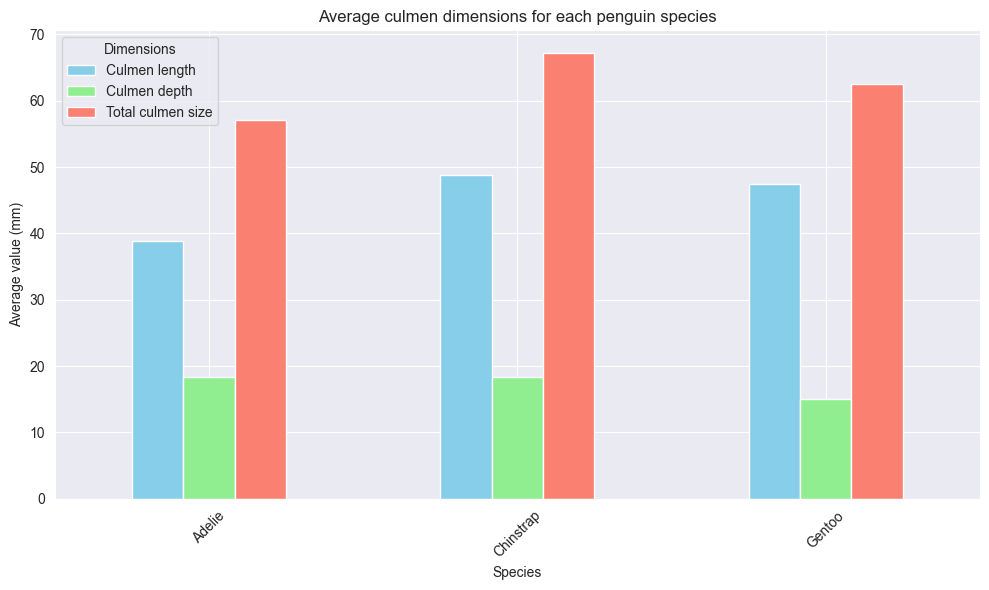

Average culmen dimensions for each species:
           culmen_length_mm  culmen_depth_mm  total_beak_size
species                                                      
Adelie            38.791391        18.346358        57.137748
Chinstrap         48.833824        18.420588        67.254412
Gentoo            47.504878        14.982114        62.486992

Species with the largest average culmen: Chinstrap
Average culmen length: 48.83 mm
Average culmen depth: 18.42 mm
Total culmen size: 67.25 mm


In [67]:
# Calculating average culmen dimensions by species
average_beak_size = data.groupby('species')[['culmen_length_mm', 'culmen_depth_mm']].mean()
average_beak_size['total_beak_size'] = average_beak_size['culmen_length_mm'] + average_beak_size['culmen_depth_mm']

largest_beak_species = average_beak_size['total_beak_size'].idxmax()
largest_beak_size = average_beak_size.loc[largest_beak_species]

# Bar chart
average_beak_size[['culmen_length_mm', 'culmen_depth_mm', 'total_beak_size']].plot(
    kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon']
)
plt.title("Average culmen dimensions for each penguin species")
plt.ylabel("Average value (mm)")
plt.xlabel("Species")
plt.xticks(rotation=45)
plt.legend(["Culmen length", "Culmen depth", "Total culmen size"], title="Dimensions")
plt.tight_layout()
plt.show()

# Display results
print("Average culmen dimensions for each species:")
print(average_beak_size)
print(f"\nSpecies with the largest average culmen: {largest_beak_species}")
print(f"Average culmen length: {largest_beak_size['culmen_length_mm']:.2f} mm")
print(f"Average culmen depth: {largest_beak_size['culmen_depth_mm']:.2f} mm")
print(f"Total culmen size: {largest_beak_size['total_beak_size']:.2f} mm")

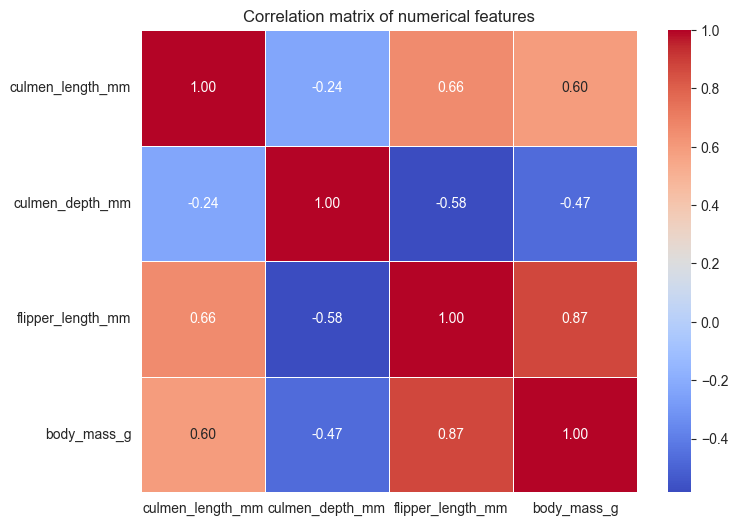

In [68]:
# Correlation matrix for numerical features
correlation_matrix = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix of numerical features")
plt.show()

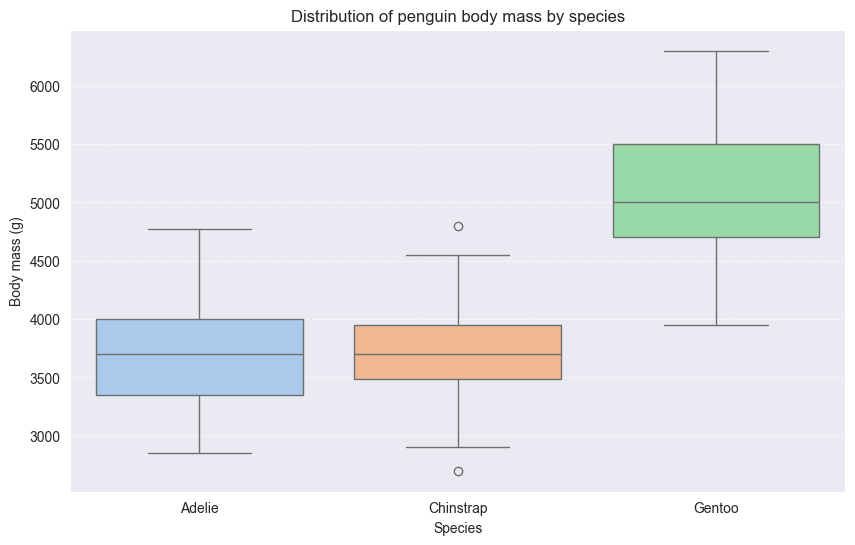

In [69]:
# Boxplot: body mass distribution by species
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='species', y='body_mass_g', hue='species', palette='pastel')
plt.title("Distribution of penguin body mass by species")
plt.xlabel("Species")
plt.ylabel("Body mass (g)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

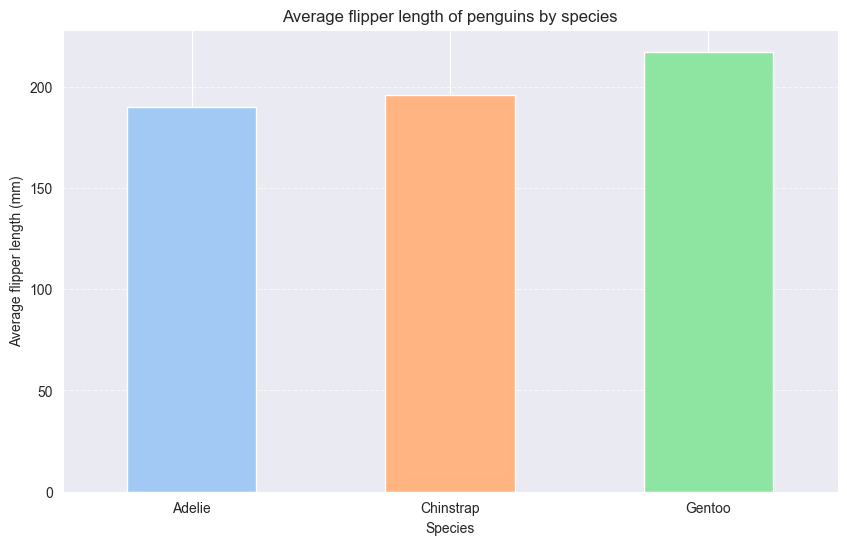

In [72]:
# Bar chart: average flipper length by species
average_flipper_length = data.groupby('species')['flipper_length_mm'].mean()

plt.figure(figsize=(10, 6))
average_flipper_length.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title("Average flipper length of penguins by species")
plt.xlabel("Species")
plt.ylabel("Average flipper length (mm)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Percentage of males and females:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


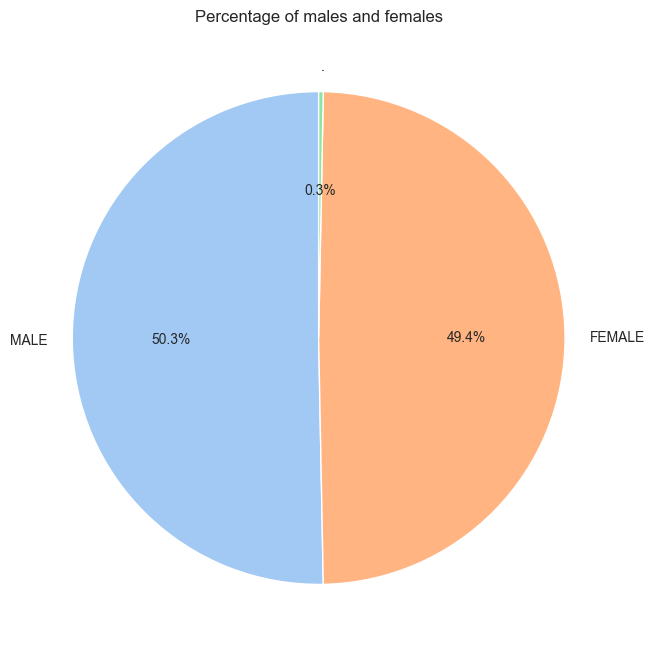

In [74]:
# Analyzing the percentage of males and females
sex_counts = data['sex'].value_counts()

# Display results
print("Percentage of males and females:")
print(sex_counts)

# Pie chart
plt.figure(figsize=(8, 8))
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Percentage of males and females")
plt.ylabel("")  # Remove Y-axis label
plt.show()

Average body mass of penguins for each species:
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


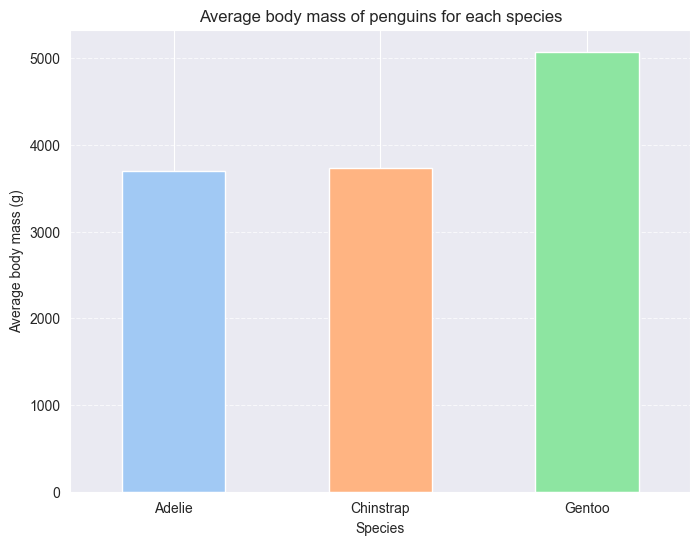

In [75]:
# Average body mass by species
average_mass_species = data.groupby('species')['body_mass_g'].mean()

# Display results
print("Average body mass of penguins for each species:")
print(average_mass_species)

# Bar chart
plt.figure(figsize=(8, 6))
average_mass_species.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title("Average body mass of penguins for each species")
plt.xlabel("Species")
plt.ylabel("Average body mass (g)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average body mass for each sex:
sex
.         4875.000000
FEMALE    3862.272727
MALE      4545.684524
Name: body_mass_g, dtype: float64


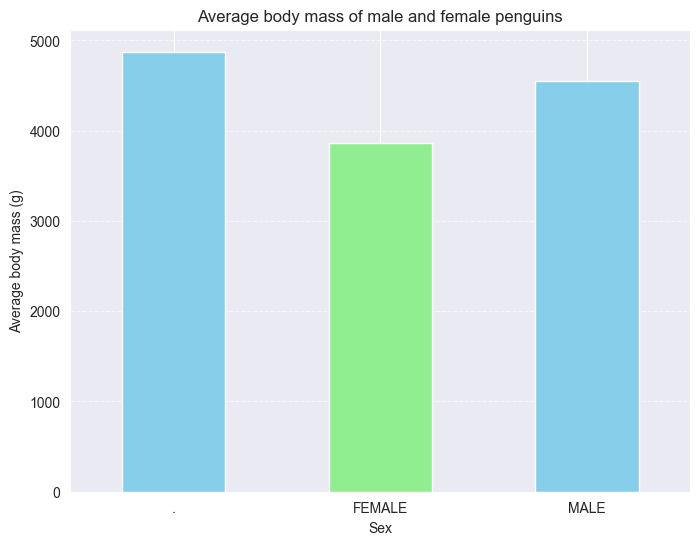

In [76]:
# Average body mass by sex
data_cleaned = data.dropna(subset=['sex'])
average_mass_by_sex = data_cleaned.groupby('sex')['body_mass_g'].mean()

# Display results
print("Average body mass for each sex:")
print(average_mass_by_sex)

# Bar chart
plt.figure(figsize=(8, 6))
average_mass_by_sex.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Average body mass of male and female penguins")
plt.xlabel("Sex")
plt.ylabel("Average body mass (g)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Average flipper length for each sex:
sex
.         217.000000
FEMALE    197.363636
MALE      204.505952
Name: flipper_length_mm, dtype: float64


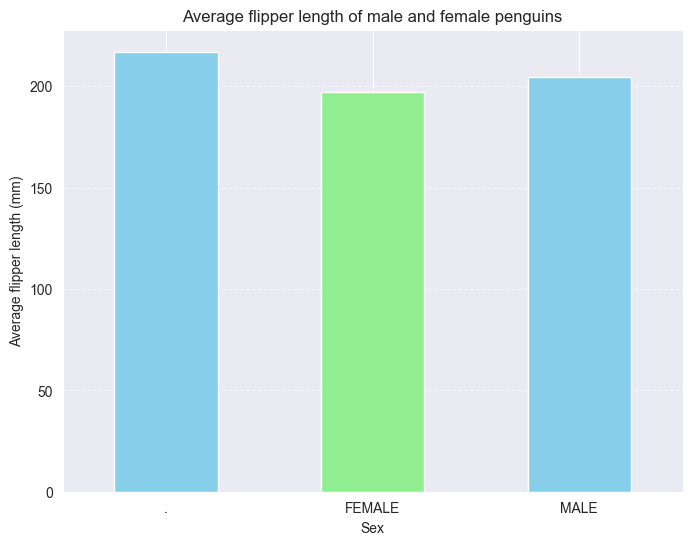

In [77]:
# Average flipper length by sex
average_flipper_length_by_sex = data.groupby('sex')['flipper_length_mm'].mean()

# Display results
print("Average flipper length for each sex:")
print(average_flipper_length_by_sex)

# Bar chart
plt.figure(figsize=(8, 6))
average_flipper_length_by_sex.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Average flipper length of male and female penguins")
plt.xlabel("Sex")
plt.ylabel("Average flipper length (mm)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

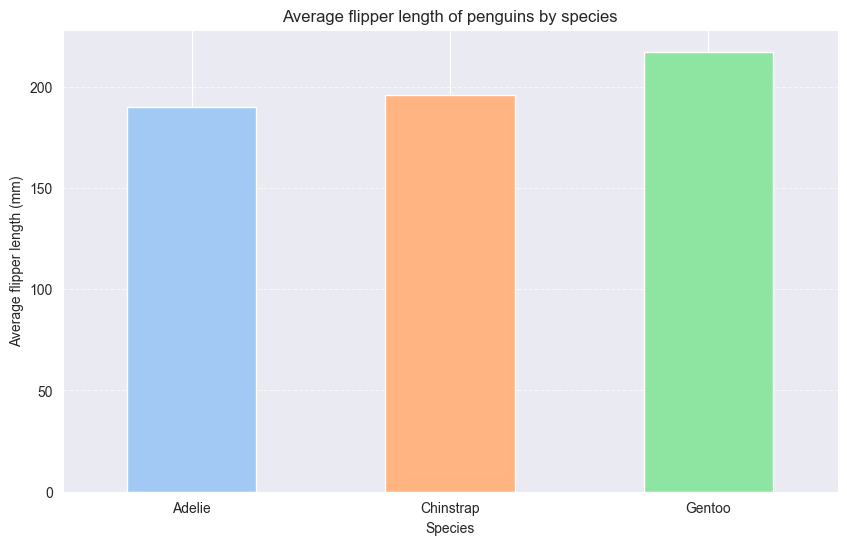

In [78]:
# Average flipper length by species
average_flipper_length_by_species = data.groupby('species')['flipper_length_mm'].mean()

# Bar chart
plt.figure(figsize=(10, 6))
average_flipper_length_by_species.plot(kind='bar', color=sns.color_palette('pastel'))
plt.title("Average flipper length of penguins by species")
plt.xlabel("Species")
plt.ylabel("Average flipper length (mm)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()